In [3]:

"""Importing the libraries"""
import numpy as np
import pandas as pd 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy




In [5]:
def mean_euclidean_error(y_true, y_pred):
    """
    mean euclidean error MEE
    """

    error = 0
    if len(y_true) == len(y_pred):
        for i in range(len(y_true)):
            error = error + np.sqrt(np.square(y_pred[i][0]
                                    - y_true[i][0])
                                    + np.square(y_pred[i][1]
                                    - y_true[i][1]))
        return error / len(y_true)

In [6]:
"""Importing the dataset"""

train_df = pd.read_csv('../data/ML-CUP20-TR .csv')
test_df = pd.read_csv('../data/ML-CUP20-TS.csv')
test_cup = pd.read_csv('../data/ML-CUP20-TS.csv')

In [67]:
"""test dataset for cup """

test_cup

array([[ 0.807179, -0.490503, -0.316058, ..., -0.869237, -0.362536,
         1.361925],
       [-1.223277,  1.115751,  0.942666, ...,  0.680087,  1.326409,
        -1.462774],
       [-1.342716,  0.639824,  1.400384, ..., -0.869237,  0.819726,
        -1.049404],
       ...,
       [ 1.165495, -1.263884, -1.117065, ..., -1.573476, -0.869219,
         0.121813],
       [ 0.926617, -0.906939, -0.659347, ..., -0.72839 , -0.700325,
         1.361925],
       [ 0.807179, -0.96643 , -0.773776, ..., -0.72839 , -0.475132,
         1.29303 ]])

In [7]:
"""Splitting the dataset into the Training set and Test set"""

train_x = train_df.iloc[:, :-2].to_numpy()
train_y = train_df.iloc[:, [10, 11]].to_numpy()


In [8]:
"""Splitting the dataset into the Training set and Test set"""

(x_dev, x_test, y_dev, y_test) = train_test_split(train_x, train_y,
        test_size=0.25, random_state=30)
(x_train, x_val, y_train, y_val) = train_test_split(x_dev, y_dev,
        test_size=0.25, random_state=30)

In [9]:
""" Fitting KNN to the Training set with the best parameters obtained form gridsearch"""

knn_model = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                     with_std=True)), ('estimator',
                     RegressorChain(KNeighborsRegressor(
    algorithm='auto',
    leaf_size=1,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    n_neighbors=9,
    p=2,
    weights='distance',
    ), order=[0, 1]))]).fit(x_train, y_train)

In [13]:
""" Predicting the Test set results """

y_trpred =knn_model.predict(x_train)
y_vlpred = knn_model.predict(x_val)
y_tspred = knn_model.predict(x_test)


In [14]:
"""  summarize performance """

print(f"Mean_euclidean_error for TR dataset :{mean_euclidean_error(y_trpred, y_train)}" )
print(f"Mean_euclidean_error for VL dataset :{mean_euclidean_error(y_vlpred, y_val)}" )
print(f"Mean_euclidean_error for TS dataset :{mean_euclidean_error(y_tspred, y_test)}" )



Mean_euclidean_error for TR dataset :0.0
Mean_euclidean_error for VL dataset :2.795157338503096
Mean_euclidean_error for TS dataset :2.706551541046348


Text(0, 0.5, 'Residuals')

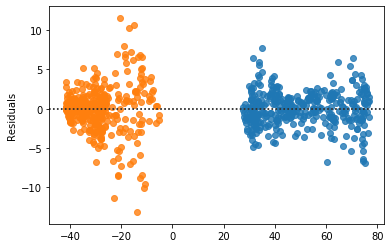

In [15]:
"""Visualising model results """
# we expect to see the result have zero mean distributed evenly around the x-axis 
sns.residplot(y_tspred[:, 0], y_test[:, 0])
sns.residplot(y_tspred[:, 1], y_test[:, 1]).set_ylabel('Residuals')

In [16]:
"""result for cup dataset """
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
x_cup_test = sc_X.transform(test_cup)

In [17]:
""" Predicting the cup test set results and dump to csv"""

y_cup = knn_model.predict(x_cup_test)
pd.DataFrame(y_cup).to_csv("SMILE_ML-CUP20-TS.csv",header=None)


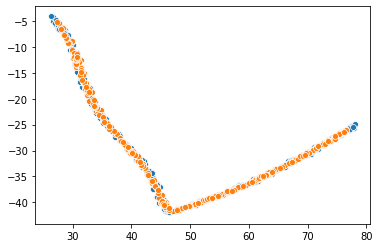

In [18]:
sns.scatterplot(y_test[:, 0], y_test[:, 1])
sns.scatterplot(y_tspred[:, 0], y_tspred[:, 1])

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 1408 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:   17.4s finished


Best parameters:{'estimator__base_estimator__algorithm': 'auto', 'estimator__base_estimator__leaf_size': 1, 'estimator__base_estimator__n_neighbors': 9, 'estimator__base_estimator__weights': 'distance'}
Best training accuracy:-8.331988657486633
 Model r2_score :0.9478572026236229
Model Mean_euclidean_error  :2.7731330780360004
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                   leaf_size=1,
                                                                   metric='minkowski',
                                                                   metric_params=None,
                                                                   n_jobs=None,
                                                                   n_neighbors=9,
    

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


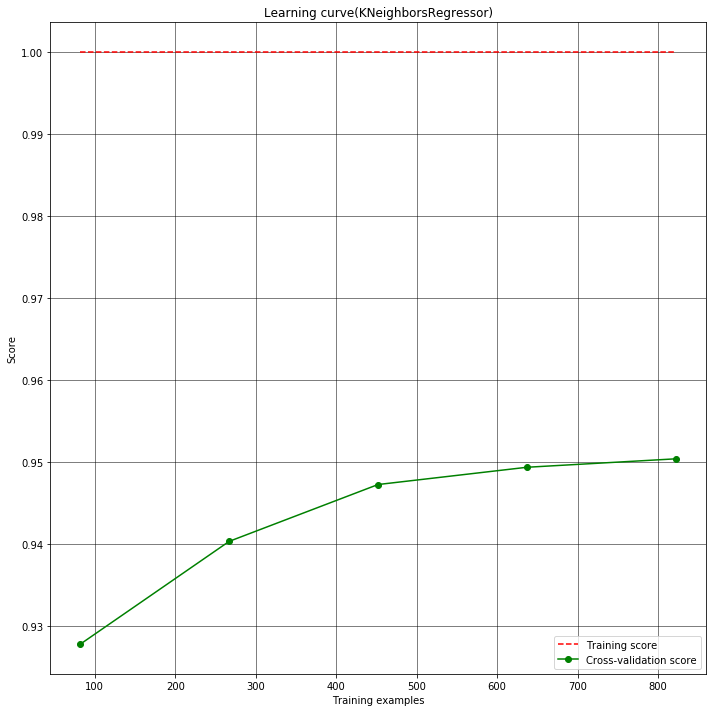

In [71]:

""" Gridsearch and Learning curve"""

Grid = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_params,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=10,
    verbose=3,
    ).fit(x_train, y_train)
y_pred = Grid.predict(x_test)

(train_sizes, train_scores, test_scores) = \
    learning_curve(Grid.best_estimator_, x_train, y_train, cv=10,
                   n_jobs=5)

print(f"Best parameters:{Grid.best_params_}")
print(f"Best training accuracy:{Grid.best_score_}")
print(f" Model r2_score :{r2_score(y_test, y_pred)}" )
print(f"Model Mean_euclidean_error  :{mean_euclidean_error(y_test, y_pred)}" )
print(f"Best model :{Grid.best_estimator_}")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
(fig, ax) = plt.subplots(1, figsize=(10, 10))
ax.grid(linestyle='-', linewidth='0.5', color='black')
ax.set_axisbelow(True)
plt.plot(train_sizes, train_scores_mean, '--', color='r',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Cross-validation score')
plt.title(f"Learning curve(KNeighborsRegressor)")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='Best')
plt.tight_layout()
plt.show()



# Direct Multioutput Regression


In [12]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import learning_curve
from sklearn import svm

# Chained Multioutput Regression